# Image compression with PCA

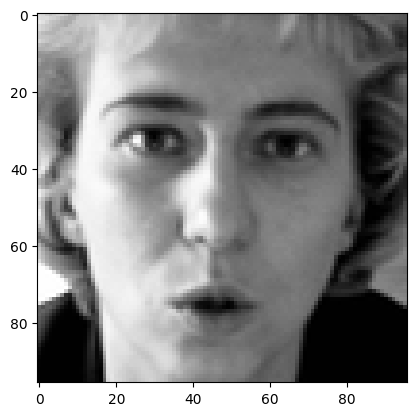

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image


df = pd.read_csv('faces.csv')

img_index = 1
width = 96
height = 96

img_values = df.loc[img_index, "Image"]
img_values = [int(i) for i in img_values.split(' ')]
raw_img = np.array(img_values, dtype=np.uint8).reshape(width, height)
img = Image.fromarray(raw_img, 'L')
plt.imshow(img, cmap='gray')

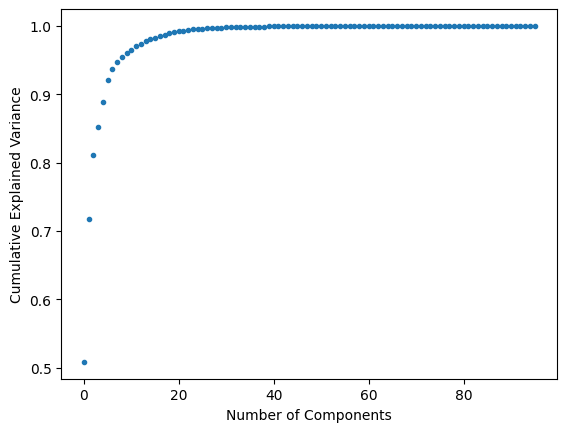

In [93]:
from sklearn.decomposition import PCA

# scale the values in raw_img to be between 0 and 1
pca = PCA(random_state=42).fit(raw_img)

plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

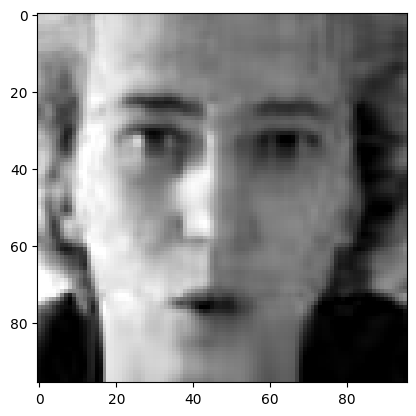

In [113]:
n_comps = 10

# compress raw_image with PCA first 20 components
pca = PCA(n_components=n_comps, random_state=42).fit(raw_img)
compressed_img = pca.fit_transform(raw_img)
compressed_img = pca.inverse_transform(compressed_img)

img = Image.fromarray(compressed_img)
plt.imshow(img, cmap='gray')